In [12]:
import sys
import os.path
#import pikepdf
#import urllib.request
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set_color_codes('pastel')

In [13]:
data = pd.read_csv("temp/meta.csv")#header=None
data

,Identifier,Author,Publisher,Datum der Erstellung,Titel,Seitenzahl,Format,Dateigröße
0,8I6sM5zapD60,NaN,NaN,01/11/19,NaN,2,Präsentation,103.9 kB
1,8ZICOHBmAHyQ,NaN,NaN,10/25/19,NaN,10,Präsentation,156.4 kB
2,3ztCv-WpxJ4U,NaN,NaN,NaN,NaN,3,Präsentation,76.9 kB
3,6mOhjfscZK2A,NaN,NaN,10/07/19,NaN,8,Präsentation,179.5 kB
4,9pHMJT-hRLrQ,NaN,NaN,01/04/22,NaN,5,Präsentation,398.7 kB
...,...,...,...,...,...,...,...,...
5210,37MxoszUOjDw,Susanne Kaiser,NaN,02/28/22,NaN,64,Präsentation,898.8 kB
5211,8nQgLPwKyxec,NaN,NaN,02/28/22,NaN,20,Präsentation,740.1 kB
5212,8wntomkrcr6g,NaN,NaN,02/28/22,NaN,11,Präsentation,454.1 kB
5213,6kpMNOf2zVq4,NaN,NaN,NaN,Saskia_Dübener-Lehrermanual-MIT_App_Inventor,20,Präsentation,3.6 MB


In [14]:
data.groupby(['Publisher']).Identifier.count().reset_index()

,Publisher,Identifier


In [15]:
author_statistics = data.groupby(['Author'])["Author"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
                                       
                                       
#author_statistics.to_csv("temp/metaauswertungauthor.csv", index=False)
author_statistics


,Author,count
0,Peter Kiessling,261
1,Prof. Dr.-Ing. Henning Zeidler,87
2,Jürgen Sachse,87
3,Prof. Hacker,72
4,Alexander Strobel,65
...,...,...
597,Lukas Deppisch,1
598,Luisa Lammert,1
599,Lucia Hacker,1
600,Lorenzo Bardoux,1


In [16]:

timedata = pd.DataFrame(data['Datum der Erstellung'])
timedata.dropna(inplace=True)
timelist=list()

for index, row in timedata.iterrows():
    #print(row['Datum der Erstellung'])
    timelist.append(datetime.strptime(row['Datum der Erstellung'],'%x'))
timedata = timedata.assign(datetime=timelist)
#df1 = df1.assign(e=pd.Series(np.random.randn(sLength)).values)
    #timelist.append(row.strftime(%x))

time_statistics = timedata.groupby(['datetime'])["datetime"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['datetime'], ascending=False, ignore_index=True)

#time_statistics.to_csv("temp/metaauswertungtime.csv", index=False)
time_statistics

,datetime,count
0,2022-06-26,3
1,2022-06-22,1
2,2022-06-17,2
3,2022-06-13,2
4,2022-05-24,2
...,...,...
1032,2004-07-29,1
1033,2003-09-30,1
1034,2001-07-05,1
1035,1998-07-10,2


<AxesSubplot:xlabel='datetime', ylabel='count'>

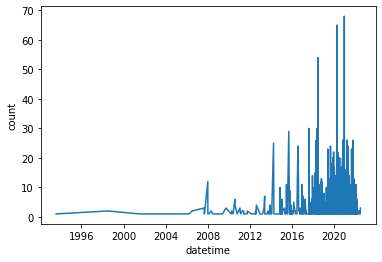

In [17]:
sns.lineplot(data = time_statistics, x="datetime", y="count")

In [18]:
page_statistics = data.groupby(['Seitenzahl'])["Seitenzahl"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Seitenzahl'], ascending=True, ignore_index=True)
page_statistics

,Seitenzahl,count
0,1,985
1,2,517
2,3,283
3,4,189
4,5,176
...,...,...
169,591,3
170,623,2
171,857,2
172,1018,1


<AxesSubplot:xlabel='Seitenzahl', ylabel='count'>

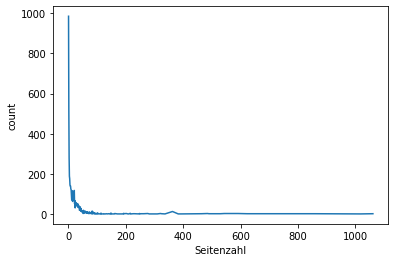

In [19]:
sns.lineplot(data = page_statistics, x="Seitenzahl", y="count")

In [20]:
format_statistics = data.groupby(['Format'])["Format"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
format_statistics

,Format,count
0,Präsentation,3174
1,Dokument,2041


<AxesSubplot:xlabel='Format', ylabel='count'>

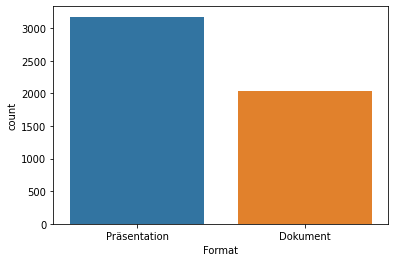

In [21]:
sns.barplot(data = format_statistics, x="Format", y="count")

In [26]:
#Dateigröße
sizedata = pd.DataFrame(data['Dateigröße'])
sizedata.dropna(inplace=True)
sizelist = list()

for index, row in sizedata.iterrows():
    sizesplitter = row['Dateigröße'].split(" ", 1)
    if sizesplitter[1] == "GB":
        sizelist.append(float(sizesplitter[0]) * 1000000000)
    elif sizesplitter[1] == "MB":
        sizelist.append(float(sizesplitter[0]) * 1000000)
    elif sizesplitter[1] == "kB":
        sizelist.append(float(sizesplitter[0]) * 1000)
    else:
        sizelist.append(float(sizesplitter[0]))
    #print(row['Dateigröße'])
sizelist
sizedata = sizedata.assign(size=sizelist)
#df1 = df1.assign(e=pd.Series(np.random.randn(sLength)).values)
    #timelist.append(row.strftime(%x))

size_statistics = sizedata.groupby(['size'])["size"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['size'], ascending=True, ignore_index=True)
size_statistics

,size,count
0,6000.0,28
1,6100.0,1
2,6300.0,1
3,7000.0,1
4,7600.0,1
...,...,...
2146,122700000.0,1
2147,177400000.0,3
2148,198500000.0,1
2149,203300000.0,1


<AxesSubplot:xlabel='size', ylabel='count'>

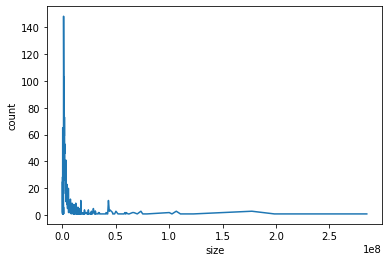

In [27]:
sns.lineplot(data = size_statistics, x="size", y="count")